In [67]:
import os
import matplotlib.pyplot as plt
import shutil

KeyboardInterrupt: 

In [57]:
temp_list=[]
for i in os.listdir(test_path):
    count=0
    for j in os.listdir(test_path+"/"+i):
        count +=1
    temp_list.append(count)

size = min(temp_list)
print(size)


831


In [59]:
dataset_path = "C:/Dev/iso/ai8x-training/data/emotion_recognition/"

processed_dataset_path = os.path.join(dataset_path, "augmented")

if os.path.isdir(processed_dataset_path):
    print("augmented folder exits. Remove if you want to regenerate")

train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
processed_train_path = os.path.join(processed_dataset_path, "train")
processed_test_path = os.path.join(processed_dataset_path, "test")
if not os.path.isdir(processed_dataset_path):
    os.makedirs(processed_dataset_path, exist_ok=True)
    os.makedirs(processed_test_path, exist_ok=True)
    os.makedirs(processed_train_path, exist_ok=True)

    # create label folders
    for d in os.listdir(test_path):
        mk = os.path.join(processed_test_path, d)
        try:
            os.mkdir(mk)
        except OSError as e:
            if e.errno == errno.EEXIST:
                print(f'{mk} already exists!')
            else:
                raise
    for d in os.listdir(train_path):
        mk = os.path.join(processed_train_path, d)
        try:
            os.mkdir(mk)
        except OSError as e:
            if e.errno == errno.EEXIST:
                print(f'{mk} already exists!')
            else:
                raise
    """**************** TEST DATASET ****************"""
    #secting the min sample for trimming
    temp_list=[]
    for i in os.listdir(test_path):
        count=0
        for j in os.listdir(test_path+"/"+i):
            count +=1
        temp_list.append(count)

    size = min(temp_list)

    # copy test folder files
    test_cnt = 0
    for (dirpath, _, filenames) in os.walk(test_path):
        print(f'copying {dirpath} -> {processed_test_path}')
        for filename in filenames[:size]:
            if filename.endswith('.jpg'):
                relsourcepath = os.path.relpath(dirpath, test_path)
                destpath = os.path.join(processed_test_path, relsourcepath)

                destfile = os.path.join(destpath, filename)
                shutil.copyfile(os.path.join(dirpath, filename), destfile)
                test_cnt += 1

    """**************** TEST DATASET ****************"""
    #secting the min sample for trimming
    temp_list=[]
    for i in os.listdir(train_path):
        count=0
        for j in os.listdir(train_path+"/"+i):
            count +=1
        temp_list.append(count)

    size = min(temp_list)

    # copy train folder files
    train_cnt = 0
    for (dirpath, _, filenames) in os.walk(train_path):
        print(f'copying {dirpath} -> {processed_train_path}')
        for filename in filenames[:size]:
            if filename.endswith('.jpg'):
                relsourcepath = os.path.relpath(dirpath, train_path)
                destpath = os.path.join(processed_train_path, relsourcepath)

                destfile = os.path.join(destpath, filename)
                shutil.copyfile(os.path.join(dirpath, filename), destfile)
                test_cnt += 1

copying C:/Dev/iso/ai8x-training/data/emotion_recognition/test -> C:/Dev/iso/ai8x-training/data/emotion_recognition/augmented\test
copying C:/Dev/iso/ai8x-training/data/emotion_recognition/test\angry -> C:/Dev/iso/ai8x-training/data/emotion_recognition/augmented\test
copying C:/Dev/iso/ai8x-training/data/emotion_recognition/test\fear -> C:/Dev/iso/ai8x-training/data/emotion_recognition/augmented\test
copying C:/Dev/iso/ai8x-training/data/emotion_recognition/test\happy -> C:/Dev/iso/ai8x-training/data/emotion_recognition/augmented\test
copying C:/Dev/iso/ai8x-training/data/emotion_recognition/test\neutral -> C:/Dev/iso/ai8x-training/data/emotion_recognition/augmented\test
copying C:/Dev/iso/ai8x-training/data/emotion_recognition/test\sad -> C:/Dev/iso/ai8x-training/data/emotion_recognition/augmented\test
copying C:/Dev/iso/ai8x-training/data/emotion_recognition/test\surprise -> C:/Dev/iso/ai8x-training/data/emotion_recognition/augmented\test
copying C:/Dev/iso/ai8x-training/data/emotion

In [ ]:
###################################################################################################
#
# Copyright (C) 2018-2020 Maxim Integrated Products, Inc. All Rights Reserved.
#
# Maxim Integrated Products, Inc. Default Copyright Notice:
# https://www.maximintegrated.com/en/aboutus/legal/copyrights.html
#
###################################################################################################
#
# Portions Copyright (c) 2018 Intel Corporation
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#
"""
Emotion Recognition Dataset
"""

import os
import torchvision
from torchvision import transform

import ai8x

def emotion_recognition_get_datasets(data, load_train=True, load_test=True):
    (data_dir, args) = data
    path = data_dir
    dataset_path = os.path.join(path, "emotion_recognition")
    is_dir = os.path.isdir(dataset_path)
    if not is_dir:
        print("******************************************")
        print("Please follow the instructions below:")
        print("Download the dataset to the \'data\' folder by visiting this link: "
                "https://www.kaggle.com/datasets/chiragsoni/ferdata?resource=download'")
        print("If you do not have a Kaggle account, sign up first.")
        print("Unzip the downloaded file and find \'test\' and \'train\' folders "
                "and copy them into \'data/emotion_recognition\'. ")
        print("Make sure that images are in the following directory structure:")
        print("  \'data/emotion_recognition/train/angry\'")
        print("  \'data/emotion_recognition/train/disgust\'")
        print("  \'data/emotion_recognition/train/fear\'")
        print("  \'data/emotion_recognition/train/happy\'")
        print("  \'data/emotion_recognition/train/neutral\'")
        print("  \'data/emotion_recognition/train/sad\'")
        print("  \'data/emotion_recognition/train/surprise\'")
        print("  \'data/emotion_recognition/test/angry\'")
        print("  \'data/emotion_recognition/test/disgust\'")
        print("  \'data/emotion_recognition/test/fear\'")
        print("  \'data/emotion_recognition/test/happy\'")
        print("  \'data/emotion_recognition/test/neutral\'")
        print("  \'data/emotion_recognition/test/sad\'")
        print("  \'data/emotion_recognition/test/surprise\'")
        print("Re-run the script. The script will create an \'augmented\' folder ")
        print("with all the original and augmented images. Remove this folder if you want "
                "to change the augmentation and to recreate the dataset.")
        print("******************************************")
        sys.exit("Dataset not found!")
    else:
        processed_dataset_path = os.path.join(dataset_path, "augmented")

        if os.path.isdir(processed_dataset_path):
            print("augmented folder exits. Remove if you want to regenerate")

        train_path = os.path.join(dataset_path, "train")
        test_path = os.path.join(dataset_path, "test")
        processed_train_path = os.path.join(processed_dataset_path, "train")
        processed_test_path = os.path.join(processed_dataset_path, "test")
        if not os.path.isdir(processed_dataset_path):
            os.makedirs(processed_dataset_path, exist_ok=True)
            os.makedirs(processed_test_path, exist_ok=True)
            os.makedirs(processed_train_path, exist_ok=True)

            # create label folders
            for d in os.listdir(test_path):
                mk = os.path.join(processed_test_path, d)
                try:
                    os.mkdir(mk)
                except OSError as e:
                    if e.errno == errno.EEXIST:
                        print(f'{mk} already exists!')
                    else:
                        raise
            for d in os.listdir(train_path):
                mk = os.path.join(processed_train_path, d)
                try:
                    os.mkdir(mk)
                except OSError as e:
                    if e.errno == errno.EEXIST:
                        print(f'{mk} already exists!')
                    else:
                        raise
            """**************** TEST DATASET ****************"""
            #secting the min sample for trimming
            temp_list=[]
            for i in os.listdir(test_path):
                count=0
                for j in os.listdir(test_path+"/"+i):
                    count +=1
                temp_list.append(count)

            size = min(temp_list)

            # copy test folder files
            test_cnt = 0
            for (dirpath, _, filenames) in os.walk(test_path):
                print(f'copying {dirpath} -> {processed_test_path}')
                for filename in filenames[:size]:
                    if filename.endswith('.jpg'):
                        relsourcepath = os.path.relpath(dirpath, test_path)
                        destpath = os.path.join(processed_test_path, relsourcepath)

                        destfile = os.path.join(destpath, filename)
                        shutil.copyfile(os.path.join(dirpath, filename), destfile)
                        test_cnt += 1

            """**************** TEST DATASET ****************"""
            #secting the min sample for trimming
            temp_list=[]
            for i in os.listdir(train_path):
                count=0
                for j in os.listdir(train_path+"/"+i):
                    count +=1
                temp_list.append(count)

            size = min(temp_list)

            # copy train folder files
            train_cnt = 0
            for (dirpath, _, filenames) in os.walk(train_path):
                print(f'copying {dirpath} -> {processed_train_path}')
                for filename in filenames[:size]:
                    if filename.endswith('.jpg'):
                        relsourcepath = os.path.relpath(dirpath, train_path)
                        destpath = os.path.join(processed_train_path, relsourcepath)

                        destfile = os.path.join(destpath, filename)
                        shutil.copyfile(os.path.join(dirpath, filename), destfile)
                        test_cnt += 1

     # Loading and normalizing train dataset
    if load_train:
        train_transform = transforms.Compose([
            transforms.Resize((128, 128)),
            transforms.ToTensor(),
            ai8x.normalize(args=args)
        ])

        train_dataset = torchvision.datasets.ImageFolder(root=processed_train_path,
                                                         transform=train_transform)
    else:
        train_dataset = None

    # Loading and normalizing test dataset
    if load_test:
        test_transform = transforms.Compose([
            transforms.Resize((128, 128)),
            transforms.ToTensor(),
            ai8x.normalize(args=args)
        ])

        test_dataset = torchvision.datasets.ImageFolder(root=processed_test_path,
                                                        transform=test_transform)

        if args.truncate_testset:
            test_dataset.data = test_dataset.data[:1]
    else:
        test_dataset = None

    return train_dataset, test_dataset


datasets = [
    {
        'name': 'emotion_recognition',
        'input': (3, 128, 128),
        'output': ('angry', 'fear', 'happy', 'neutral', 'sad', 'surprise'),
        'loader': emotion_recognition_get_datasets,
    },
]


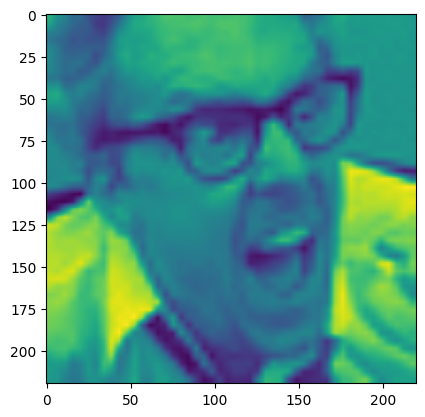

In [82]:
sample_img = os.path.join(processed_train_path, "angry/Training_3908.jpg")
img = Image.open(sample_img)
train_transform = transforms.Resize(size=(220, 220))
img= train_transform(img)
plt.imshow(img)
plt.show()

In [66]:
import torch
import torchvision
from torchvision import transforms

from PIL import Image